#KNN & PCA:-

#Theory:-

1. What is K-Nearest Neighbors (KNN) and how does it work?
 - KNN is a supervised learning algorithm that classifies a data point based on how its neighbors are classified.
It calculates the distance between the query and all the points in the data, then chooses the K nearest data points and votes for the most frequent label (in classification) or averages them (in regression).

2. What is the difference between KNN Classification and KNN Regression?

 - Classification: The output is a class label; it uses majority voting.
 - Regression: The output is a continuous value; it uses the average of neighbors.

3. What is the role of the distance metric in KNN?
 - The distance metric (like Euclidean or Manhattan) determines how neighbors are chosen.
 - It measures similarity between points; the smaller the distance, the more similar.

4. What is the Curse of Dimensionality in KNN?
 - In high dimensions, distance between points becomes less meaningful, affecting model accuracy and increasing computation.

5. How can we choose the best value of K in KNN?
 - By using cross-validation. A low K may overfit; a high K may underfit. Odd K values avoid ties in binary classification.

6. What are KD Tree and Ball Tree in KNN?
 - They are space-partitioning data structures used to optimize nearest neighbor searches in KNN.
 - KD Tree is good for low dimensions; Ball Tree handles high-dimensional data better.

7. When should you use KD Tree vs. Ball Tree?
 - KD Tree: Fewer dimensions (typically <20)
 - Ball Tree: Higher-dimensional data or when KD tree performance degrades

8. What are the disadvantages of KNN?
 - Computationally expensive (especially on large datasets)
 - Sensitive to irrelevant features and feature scaling
 - Poor performance with imbalanced data

9. How does feature scaling affect KNN?
 - It has a huge impact since KNN relies on distance metrics. Features with larger scales dominate unless scaled.

10. What is PCA (Principal Component Analysis)?
 - PCA is an unsupervised dimensionality reduction technique that transforms data into a set of linearly uncorrelated variables called principal components.

11. How does PCA work?

 - 1. Standardize the data.
 - 2. Compute the covariance matrix.
 - 3. Compute eigenvectors and eigenvalues.
 - 4. Sort eigenvectors by decreasing eigenvalues.
 - 5. Project data onto the top-k eigenvectors.

12. What is the geometric intuition behind PCA?
 - PCA finds new axes (directions) that capture the most variance in the data and rotates the data to align with these axes.

13. What is the difference between Feature Selection and Feature Extraction?
 - Feature Selection: Selects a subset of original features.
 - Feature Extraction: Creates new features (e.g., PCA creates components).

14. What are Eigenvalues and Eigenvectors in PCA?
 - Eigenvectors define the direction of the new feature space (principal components).
 - Eigenvalues define the magnitude of variance explained by each component.

15. How do you decide the number of components to keep in PCA?
 - Use the explained variance ratio or a Scree plot to decide the number of components that retain sufficient variance (e.g., 95%).

16. Can PCA be used for classification?
 - Yes, PCA is often used as a preprocessing step to reduce dimensionality before applying a classifier.

17. What are the limitations of PCA?
 - Assumes linearity
 - May discard informative features
 - Sensitive to scaling
 - Hard to interpret components

18. How do KNN and PCA complement each other?
 - PCA reduces dimensionality and noise, improving KNN performance by avoiding the curse of dimensionality.

19. How does KNN handle missing values in a dataset?
 - KNN can be used for imputation (KNN Imputer), but for prediction, it typically requires complete data unless preprocessing is done.

20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
 - PCA: Unsupervised, maximizes variance
 - LDA: Supervised, maximizes class separability
 - PCA uses total variance, LDA uses between-class and within-class scatter

#Practicals:-

In [2]:
# 21. Train a KNN Classifier on the Iris dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

Accuracy: 0.9736842105263158


In [3]:
# 22. Train a KNN Regressor on a synthetic dataset and evaluate using MSE
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)
print("MSE:", mean_squared_error(y_test, reg.predict(X_test)))

MSE: 253.23479680035652


In [13]:
# 23. Train a KNN Classifier using Euclidean and Manhattan distances
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

for metric in ['euclidean', 'manhattan']:
    model = KNeighborsClassifier(metric=metric)
    model.fit(X_train, y_train)
    print(f"{metric} Accuracy:", accuracy_score(y_test, model.predict(X_test)))

euclidean Accuracy: 0.9736842105263158
manhattan Accuracy: 0.9736842105263158


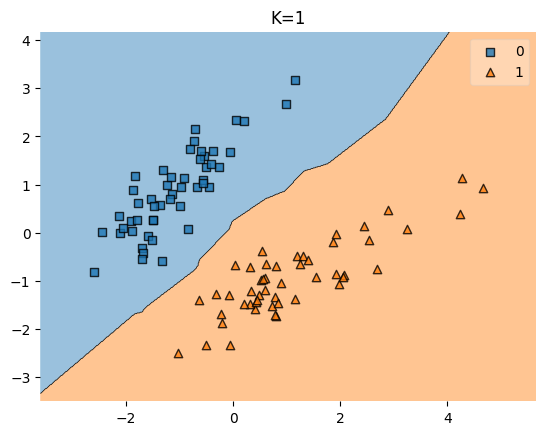

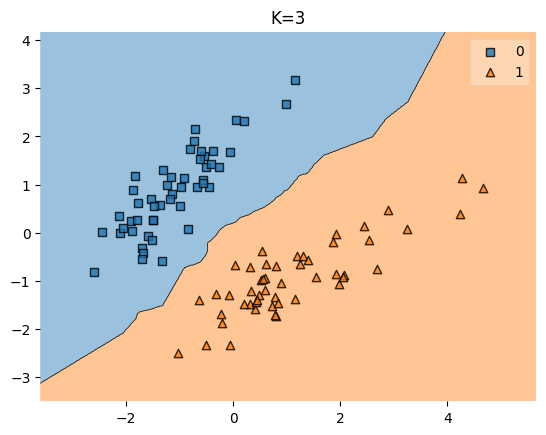

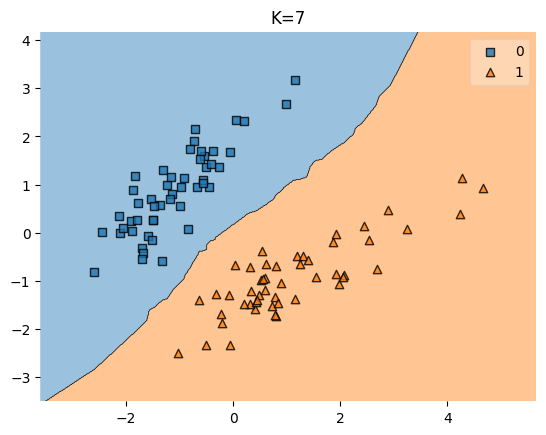

In [5]:
# 24. KNN Classifier with different values of K - visualize decision boundaries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
for k in [1, 3, 7]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    plt.figure()
    plot_decision_regions(X, y, clf=model)
    plt.title(f"K={k}")
plt.show()

In [6]:
# 25. Apply feature scaling before training KNN model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, iris.target)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("Scaled Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Scaled Accuracy: 0.9736842105263158


In [7]:
# 26. Train PCA model and print explained variance ratio.
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.72962445 0.22850762 0.03668922 0.00517871]


In [8]:
# 27. Apply PCA before KNN and compare accuracy
X_pca = pca.transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca[:, :2], iris.target)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("PCA+KNN Accuracy:", accuracy_score(y_test, model.predict(X_test)))

PCA+KNN Accuracy: 0.9473684210526315


In [9]:
# 28. Perform Hyperparameter Tuning on KNN Classifier
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [3, 5, 7]}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=3)
grid.fit(X_scaled, iris.target)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'n_neighbors': 5}


In [10]:
# 29. Train KNN Classifier and check misclassified samples
X_train, X_test, y_train, y_test = train_test_split(X_scaled, iris.target)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Misclassified samples:", np.sum(y_pred != y_test))

Misclassified samples: 2


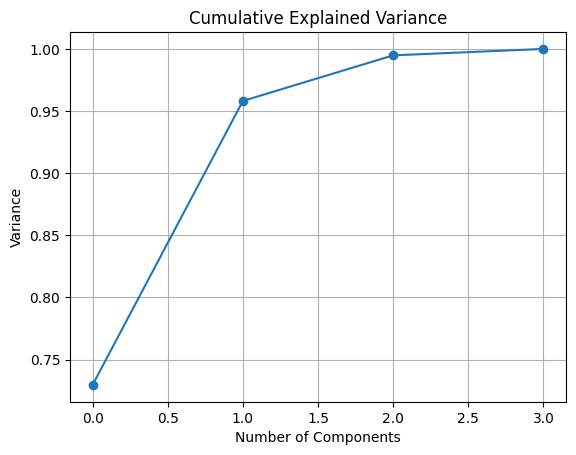

In [12]:
# 30. Train PCA and visualize cumulative explained variance
cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Variance")
plt.grid(True)
plt.show()

In [14]:
#31.Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compareaccuracy.
for weight in ['uniform', 'distance']:
    model = KNeighborsClassifier(weights=weight)
    model.fit(X_train, y_train)
    print(f"Weights={weight}, Accuracy={accuracy_score(y_test, model.predict(X_test))}")

Weights=uniform, Accuracy=0.9736842105263158
Weights=distance, Accuracy=0.9473684210526315


In [15]:
#32.Train a KNN Regressor and analyze the effect of different K values on performance.
for k in [1, 3, 5, 10]:
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    print(f"K={k}, MSE={mean_squared_error(y_test, pred)}")

K=1, MSE=0.05263157894736842
K=3, MSE=0.029239766081871347
K=5, MSE=0.02526315789473684
K=10, MSE=0.030526315789473683


In [16]:
#33.Implement KNN Imputation for handling missing values in a dataset.
import pandas as pd
from sklearn.impute import KNNImputer

data_with_nan = pd.DataFrame(iris.data)
data_with_nan.iloc[0:10, 0] = np.nan  # Introduce NaNs
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(data_with_nan)
print("Missing values imputed.")

Missing values imputed.


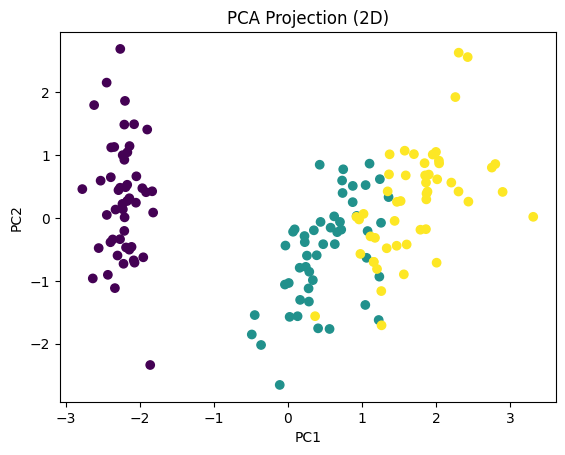

In [17]:
#34.Train a PCA model and visualize the data projection onto the first two principal components.
pca = PCA(n_components=2)
proj = pca.fit_transform(X_scaled)
plt.scatter(proj[:, 0], proj[:, 1], c=iris.target, cmap='viridis')
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [18]:
#35.Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.
for algo in ['kd_tree', 'ball_tree']:
    model = KNeighborsClassifier(algorithm=algo)
    model.fit(X_train, y_train)
    print(f"Algorithm={algo}, Accuracy={accuracy_score(y_test, model.predict(X_test))}")

Algorithm=kd_tree, Accuracy=0.9736842105263158
Algorithm=ball_tree, Accuracy=0.9736842105263158


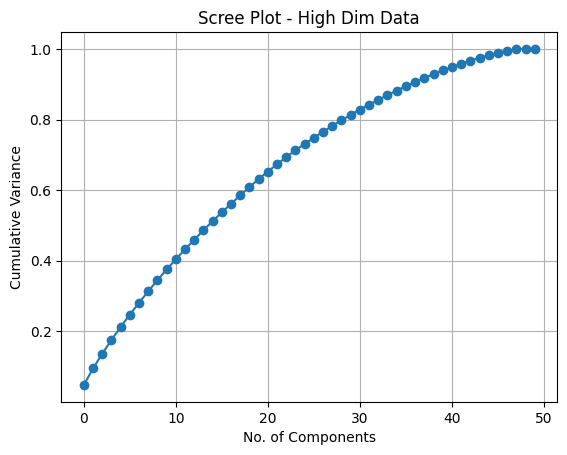

In [19]:
#36.Train a PCA model on a high-dimensional dataset and visualize the Scree plot.
from sklearn.datasets import make_classification
X_hd, _ = make_classification(n_samples=200, n_features=50)
X_hd = StandardScaler().fit_transform(X_hd)
pca_hd = PCA()
pca_hd.fit(X_hd)
plt.plot(np.cumsum(pca_hd.explained_variance_ratio_), marker='o')
plt.title("Scree Plot - High Dim Data")
plt.xlabel("No. of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.show()

In [20]:
#37.Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.
from sklearn.metrics import precision_score, recall_score, f1_score

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Precision: 0.9696969696969697
Recall: 0.9761904761904763
F1 Score: 0.9717813051146384


In [21]:
#38.Train a PCA model and analyze the effect of different numbers of components on accuracy.
for n in [1, 2, 3, 4]:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, iris.target)
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Components={n}, Accuracy={acc:.3f}")

Components=1, Accuracy=0.895
Components=2, Accuracy=0.921
Components=3, Accuracy=0.947
Components=4, Accuracy=0.921


In [22]:
#39.Train a KNN Classifier with different leaf_size values and compare accuracy.
for size in [10, 20, 30, 50]:
    model = KNeighborsClassifier(leaf_size=size)
    model.fit(X_train, y_train)
    print(f"Leaf Size={size}, Accuracy={accuracy_score(y_test, model.predict(X_test))}")

Leaf Size=10, Accuracy=0.9210526315789473
Leaf Size=20, Accuracy=0.9210526315789473
Leaf Size=30, Accuracy=0.9210526315789473
Leaf Size=50, Accuracy=0.9210526315789473


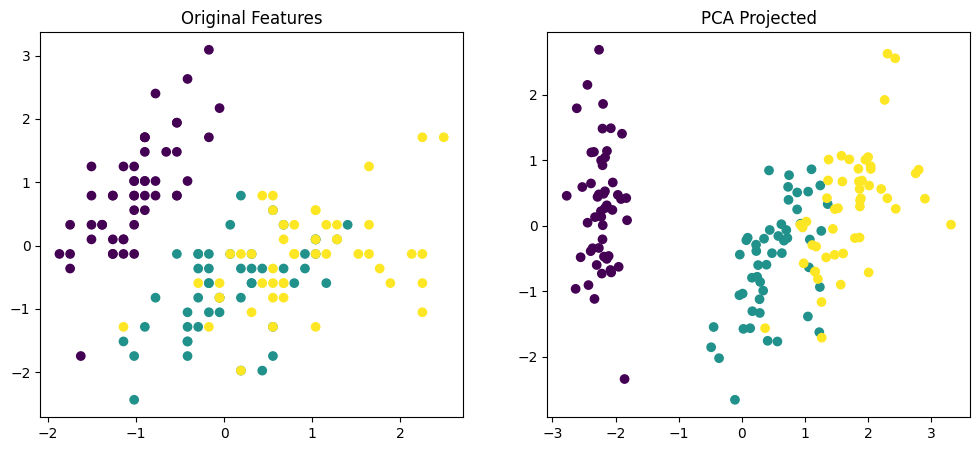

In [23]:
#40.Train a PCA model and visualize how data points are transformed before and after PCA.
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=iris.target)
axs[0].set_title("Original Features")
axs[1].scatter(proj[:, 0], proj[:, 1], c=iris.target)
axs[1].set_title("PCA Projected")
plt.show()

In [24]:
#41.Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

wine = load_wine()
X_wine = StandardScaler().fit_transform(wine.data)
X_train, X_test, y_train, y_test = train_test_split(X_wine, wine.target)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.87      0.93        15
           2       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.95        45



In [25]:
#42.Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.
X, y = make_regression(n_samples=100, n_features=1, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y)
for metric in ['euclidean', 'manhattan']:
    reg = KNeighborsRegressor(metric=metric)
    reg.fit(X_train, y_train)
    print(f"Distance={metric}, MSE={mean_squared_error(y_test, reg.predict(X_test))}")

Distance=euclidean, MSE=96.20649053200961
Distance=manhattan, MSE=96.20649053200961


In [32]:
#43. Train a KNN Classifier and evaluate using ROC-AUC score.
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X_scaled = StandardScaler().fit_transform(iris.data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, iris.target)

# Binarize the test labels for ROC-AUC calculation
y_test_bin = label_binarize(y_test, classes=[0,1,2])

model = KNeighborsClassifier()
model.fit(X_train, y_train) # Train with original labels
probs = model.predict_proba(X_test)

print("ROC AUC:", roc_auc_score(y_test_bin, probs, multi_class='ovr'))

ROC AUC: 0.9943269932494069


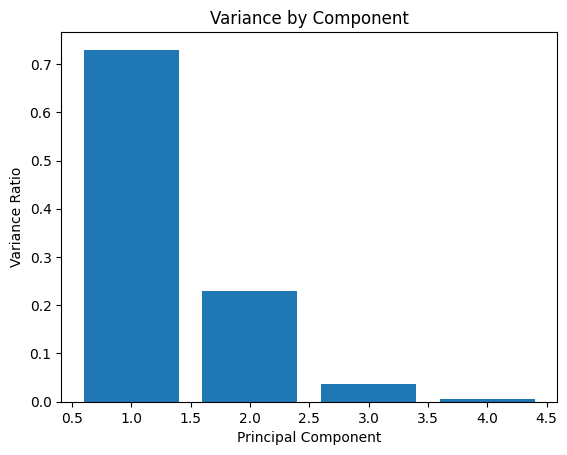

In [27]:
#44.Train a PCA model and visualize the variance captured by each principal component.
pca = PCA()
pca.fit(X_scaled)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.title("Variance by Component")
plt.show()

In [28]:
#45.Train a KNN Classifier and perform feature selection before training.
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_scaled, iris.target)
X_train, X_test, y_train, y_test = train_test_split(X_selected, iris.target)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("Accuracy after Feature Selection:", accuracy_score(y_test, model.predict(X_test)))

Accuracy after Feature Selection: 0.9736842105263158


In [29]:
#46.Train a PCA model and visualize the data reconstruction error after reducing dimensions.
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_reduced)
recon_error = np.mean((X_scaled - X_reconstructed) ** 2)
print("Reconstruction Error:", recon_error)

Reconstruction Error: 0.041867927999983595


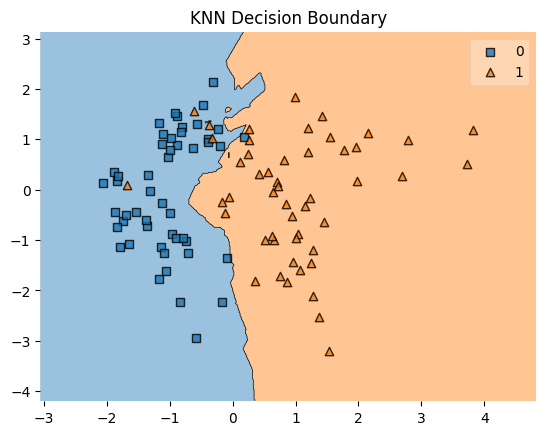

In [30]:
#47.Train a KNN Classifier and visualize the decision boundary.
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)
plot_decision_regions(X, y, clf=model)
plt.title("KNN Decision Boundary")
plt.show()

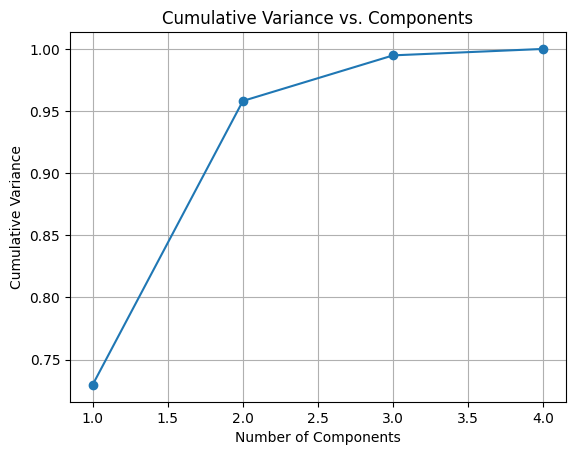

In [31]:
#48. Train a PCA model and analyze the effect of different numbers of components on data variance.
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.title("Cumulative Variance vs. Components")
plt.grid(True)
plt.show()